## 1. Ingest

- Importar la data mediante Pandas utilizando el metodo [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Visualizar las primeras 10 filas del dataset.

In [1]:
## import dependencies
import pandas as pd

In [2]:
url = 'https://topcs.blob.core.windows.net/public/FlightData.csv'

## load data from csv to dataframe
df = pd.read_csv(url)
df.head(n=10)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN
5,2016,1,1,1,5,DL,N936DL,1975,13487,MSP,...,1459,1441.0,-18.0,0.0,0.0,0.0,150.0,134.0,907.0,NaN
6,2016,1,1,2,6,DL,N983DL,2074,10397,ATL,...,1931,1920.0,-11.0,0.0,0.0,0.0,166.0,155.0,907.0,NaN
7,2016,1,1,2,6,DL,N589NW,2151,13487,MSP,...,1929,1908.0,-21.0,0.0,0.0,0.0,229.0,197.0,1399.0,NaN
8,2016,1,1,2,6,DL,N804DN,2221,13487,MSP,...,1305,1255.0,-10.0,0.0,0.0,0.0,230.0,220.0,1399.0,NaN
9,2016,1,1,2,6,DL,N965DN,2291,13487,MSP,...,1801,1800.0,-1.0,0.0,0.0,0.0,151.0,137.0,907.0,NaN


another solution:

Download csv
```bash
!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flightdata.csv
```

Load data from csv to dataframe
```
df = pd.read_csv('flightdata.csv')
df.head(n=10)
```

## 2. Process

- Analizar la data utilizando las herramientas de pandas para determinar el tipo de datos que se tienen disponibles en el dataset.
- Determinar si existe data nula y el impacto que tiene para nuestro caso de uso.
- Eliminar o completar la data nula de acuerdo al analisis previo.
- Aplicar "data [binning](https://en.wikipedia.org/wiki/Data_binning)" y convertir variables categoricas a variables de indicador para procesar la data de previo al entrenamiento del modelo.

In [3]:
# analize data
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


In [4]:
# dimensionality of the dataframe.
df.shape

(11231, 26)

In [5]:
# get data type of each column.
df.dtypes

YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
UNIQUE_CARRIER          object
TAIL_NUM                object
FL_NUM                   int64
ORIGIN_AIRPORT_ID        int64
ORIGIN                  object
DEST_AIRPORT_ID          int64
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DEL15              float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DEL15              float64
CANCELLED              float64
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
DISTANCE               float64
Unnamed: 25            float64
dtype: object

In [6]:
# check if there ir any null value
if (df.isnull().values.any()):
    print('Existen valores nulos')
else:
    print('No existen valores nulos')

Existen valores nulos


In [7]:
# check which values are null
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [8]:
# select data of last column 'Unnamed: 25' that is completely null
df.iloc[:,-1]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
11226   NaN
11227   NaN
11228   NaN
11229   NaN
11230   NaN
Name: Unnamed: 25, Length: 11231, dtype: float64

In [9]:
# remove data of last column
df = df.iloc[:,:-1]

another solution:
```
df.drop(['Unnamed: 25'], axis =1)
```

In [10]:
# inspect the output and confirm that column 26 ('Unnamed: 25') has disappeared from the DataFrame
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [11]:
# filter just required columns to the model that we want to train and inspect output and to confirm nulls is greatly reduced
df = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'ARR_DEL15']]
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [12]:
# review data with null values
df[df.isnull().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


In [13]:
# flights that were canceled or diverted are going to be treated as late
df = df.fillna({'ARR_DEL15': 1})
df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


#### Bin departure times and add indicator columns

In [14]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0


Apply data [binning](https://en.wikipedia.org/wiki/Data_binning)

In [15]:
import math

for index, row in df.iterrows():
    df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,19,0.0
1,1,1,5,DTW,MSP,13,0.0
2,1,1,5,ATL,SEA,9,0.0
3,1,1,5,SEA,MSP,8,0.0
4,1,1,5,SEA,DTW,23,0.0


Apply pandas [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to origin and destination airports

In [16]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head() 

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


## 3. Predict

Utilizar la data procesada para entrenar un modelo capaz de 'predecir' las probabilidades de que un vuelo llegue a tiempo.
- Dividir el set de datos en dator para entrenamiento y datos para prueba.
- Utilizar [Sckit-learn](https://scikit-learn.org/stable/index.html) para entrenar el modelo.
- Validar el nivel de precisión del modelo entrenado.

In [17]:
# split dataframe to use 80% per training and 20% for testing model
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=42)

In [18]:
# number of rows and columns in the DataFrame containing the feature columns used for training
train_x.shape

(8984, 14)

In [19]:
# number of rows and columns in the DataFrame containing the feature columns used for testing
test_x.shape

(2247, 14)

use [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) algorithm for training the model

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

RandomForestClassifier(random_state=13)

In [21]:
# testing model
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8642634623943035

In [22]:
# generate a set of prediction probabilities from the test data
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

In [23]:
# generate an ROC AUC score from the probabilities using Sckit-learn's roc_auc_score method
roc_auc_score(test_y, probabilities[:, 1])

0.7014819895830565

In [24]:
# generate a confusion matrix ("error matrix")
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[1903,   33],
       [ 272,   39]])

In [25]:
# generate a precision_score for computing precision
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

1.0

In [26]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.9992012779552716

## 4. Visualize

- Utilizar [Matplotlib](https://matplotlib.org/) para visualizar los resultados.
- Crear función para obtener probabilidad de atraso en vuelos para dias y horas especificos, así como origen y destinos especificos.
- Graficar posibilidades de falso / positivo.
- Graficar posibilidades de atraso para días especificos.

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0, 0.5, 'True Positive Rate')

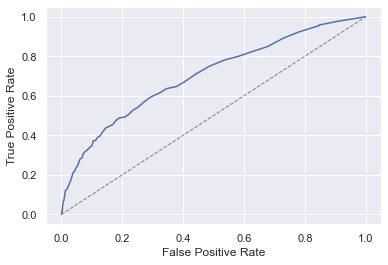

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [29]:
def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)
    
    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour
    
    origin = origin.upper()
    destination = destination.upper()

    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]

    return model.predict_proba(pd.DataFrame(input))[0][0]

In [30]:
predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL')

0.88

In [31]:
predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL')

0.87

In [32]:
predict_delay('2/10/2018 10:00:00', 'ATL', 'SEA')

0.99

### Plot predictions

(0.0, 1.0)

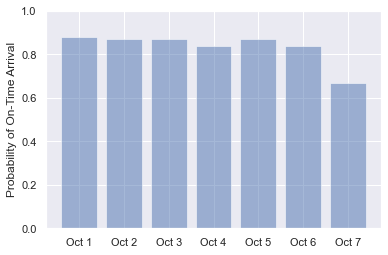

In [33]:
# plot the probability of on-time arrivals for an evening flight from JFK to ATL over a range of days
import numpy as np

labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')
values = (predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('3/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('4/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('5/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('6/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('7/10/2018 21:45:00', 'JFK', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

(0.0, 1.0)

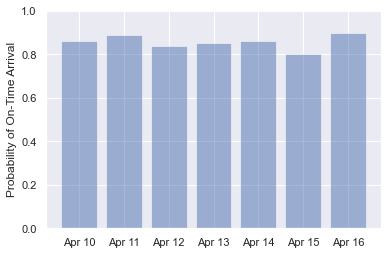

In [34]:
labels = ('Apr 10', 'Apr 11', 'Apr 12', 'Apr 13', 'Apr 14', 'Apr 15', 'Apr 16')
values = (predict_delay('10/4/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('11/4/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('12/4/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('13/4/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('14/4/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('15/4/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('16/4/2018 13:00:00', 'JFK', 'MSP'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

(0.0, 1.0)

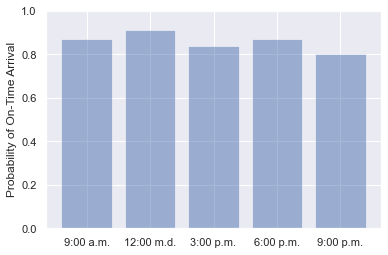

In [35]:
# graph the probability that flights leaving SEA for ATL at 9:00 a.m., noon, 3:00 p.m., 6:00 p.m., and 9:00 p.m. on January 30 will arrive on time.
labels = ('9:00 a.m.', '12:00 m.d.', '3:00 p.m.', '6:00 p.m.', '9:00 p.m.')
values = (predict_delay('30/01/2019 09:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2019 12:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2019 15:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2019 18:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2019 21:00:00', 'SEA', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))